In [121]:
import sqlalchemy
import pandas as pd
import sqlalchemy
import psycopg2
import plotly.graph_objects as go
import plotly.io as pio

import warnings

warnings.filterwarnings('ignore')

pg_user="ahakobyan"
pg_password=""
pg_host=""
pg_db="postgres"
pg_port="5432"
pg_dialect="postgresql"
pg_driver="psycopg2"

PG_CLIENT = sqlalchemy.create_engine(f"{pg_dialect}+{pg_driver}://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_db}")

In [128]:
def draw_bar_chart(df: pd.DataFrame, title: str):
    fig = go.Figure(
        data=[
            go.Bar(
                x=df['report_date'], 
                y=df['total_amount'],
                text=df['total_amount'], 
                textposition='auto'
            )
        ]
    )
    
    fig.update_layout(
        title=title,
        xaxis_title='Report Date',
        yaxis_title='Total Amount',
        xaxis=dict(
            tickmode='linear',
            dtick='M1'
        )
    )
    
    # Save the figure
    pio.write_image(fig, f"{title}.png", width=1200, height=400, scale=1)
    fig.show()

## Deferred Revenue Report
Для составления отчета по отложенной выручке, необходимо учитывать моменты времени, когда происходит оплата (момент заказа) и когда происходит доставка товара (момент признания выручки).   
Отложенная выручка — это сумма денег, полученная от клиента до того, как товар был доставлен.  
Этот доход признается как выручка только после выполнения обязательства по доставке товара.

### Таблица заказов

| Дата заказа | Дата доставки | Сумма заказа |
|-------------|---------------|--------------|
| 01.04.2024  | 05.04.2024    | 1000         |
| 03.04.2024  | 10.04.2024    | 1500         |
| 20.04.2024  | 25.04.2024    | 2000         |
| 28.04.2024  | 03.05.2024    | 1200         |
| 02.05.2024  | 07.05.2024    | 1800         |
| 15.05.2024  | 20.05.2024    | 1600         |
| 25.05.2024  | 30.05.2024    | 2200         |

### Месяц апрель

1. **Отложенная выручка на начало апреля**: 0
2. **Полученные предоплаты в апреле**: 
   - 01.04.2024: 1000
   - 03.04.2024: 1500
   - 20.04.2024: 2000
   - 28.04.2024: 1200
   - **Итого**: 5700
3. **Признанная выручка в апреле**:
   - 05.04.2024: 1000
   - 10.04.2024: 1500
   - 25.04.2024: 2000
   - **Итого**: 4500
4. **Отложенная выручка на конец апреля**: 
   - 0 (начало периода) + 5700 (предоплаты) - 4500 (признанная выручка) = 1200

### Месяц май

1. **Отложенная выручка на начало мая**: 1200 (из расчета конца апреля)
2. **Полученные предоплаты в мае**:
   - 02.05.2024: 1800
   - 15.05.2024: 1600
   - 25.05.2024: 2200
   - **Итого**: 5600
3. **Признанная выручка в мае**:
   - 03.05.2024: 1200
   - 07.05.2024: 1800
   - 20.05.2024: 1600
   - **Итого**: 4600
4. **Отложенная выручка на конец мая**: 
   - 1200 (начало периода) + 5600 (предоплаты) - 4600 (признанная выручка) = 2200

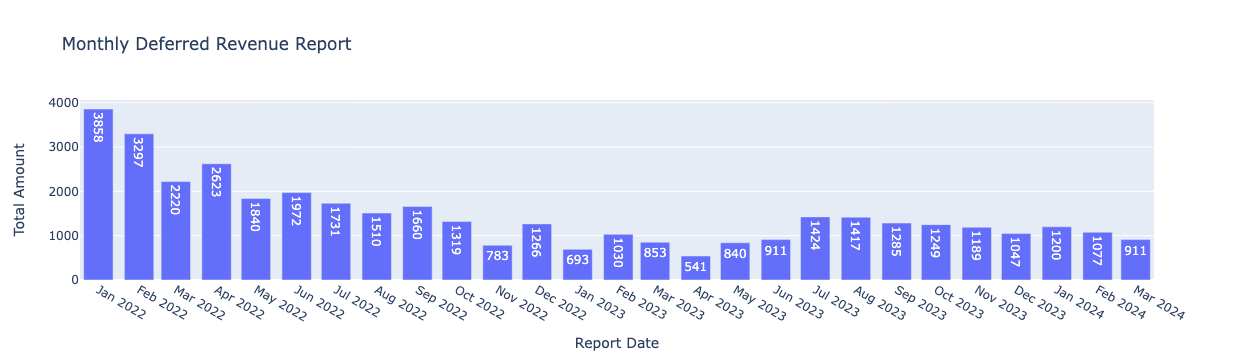

In [132]:
deferred_revenue_report = pd.read_sql(sql="SELECT * FROM public_ahakobyan.deferred_revenue_report", con=PG_CLIENT)
deferred_revenue_report['report_date'] = pd.to_datetime(deferred_revenue_report['report_date'])

draw_bar_chart(df=deferred_revenue_report, title='Monthly Deferred Revenue Report')

# Monthly Cumulative Deferred Revenue Report

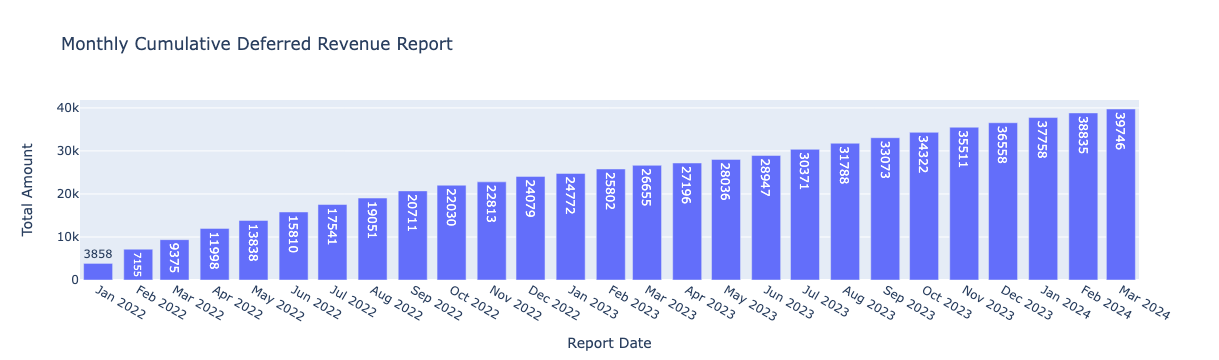

In [133]:
cumulative_deferred_revenue_report = pd.read_sql(sql="SELECT * FROM public_ahakobyan.cumulative_deferred_revenue_report", con=PG_CLIENT)
cumulative_deferred_revenue_report['report_date'] = pd.to_datetime(cumulative_deferred_revenue_report['report_date'])

draw_bar_chart(df=cumulative_deferred_revenue_report, title='Monthly Cumulative Deferred Revenue Report')

# Monthly Receivable Aging Report
This type of report provides an overview of outstanding receivables, categorized by the length of time an invoice has been outstanding.  
It helps in understanding how much money is tied up and for how long.  
This is crucial for managing cash flow and identifying potential collection issues.

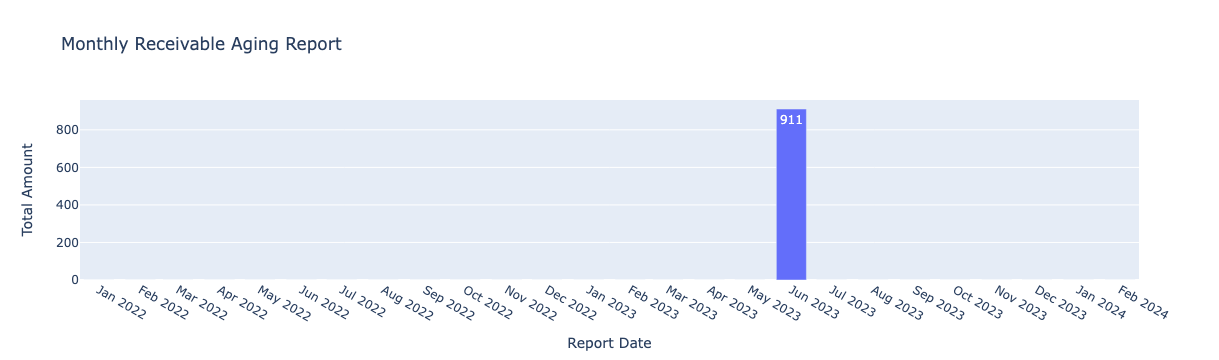

In [134]:
receivable_aging_report = pd.read_sql(sql="SELECT * FROM public_ahakobyan.receivable_aging_report", con=PG_CLIENT)
receivable_aging_report['report_date'] = pd.to_datetime(deferred_revenue_report['report_date'])

draw_bar_chart(df=receivable_aging_report, title='Monthly Receivable Aging Report')